In [3]:
from importlib import reload

from matplotlib.pyplot import imshow
from PIL import Image
from pathlib import Path
import numpy as np
import colour
from colour_demosaicing import (
    demosaicing_CFA_Bayer_Menon2007,
)

# Library of functions for working with Sinar raw files.
import sinar_ia
reload(sinar_ia)
from sinar_ia import read_sinar, process_raw, norm, read_raw, read_pwad_lumps, get_wad, process_meta, get_colors, gls, gli, gle



In [4]:
colour.plotting.colour_style()
#TEST_FILES = Path('/Users/mgolub2/Pictures/32GB_CF2_9_7_2022/002000E8.EMO') #Path('emotion75_test_files')
TEST_FILES = Path('emotion75_test_files')

def sinar_ia_to_pil(path: Path, h=5344, w=4008):
    sinar_ia = read_sinar(path)
    nd_img = process_raw(sinar_ia, h=h, w=w)
    out = demosaicing_CFA_Bayer_Menon2007(norm(nd_img), "RGGB")
    return Image.fromarray((out * 65536).astype("uint16"), mode="RGB")

In [5]:
raws = {}
for ia in TEST_FILES.glob("*.IA"):
    #ia = Path(TEST_FILES / '6C4875A9.IA')
    print(f"Reading {ia.name}...")
    raws[ia.name] = read_sinar(ia)
    raw = read_raw(ia)
    lumps = read_pwad_lumps(raw)
    meta = get_wad(raw, *lumps[b'META'])
    raw0 = get_wad(raw, *lumps[b'RAW0'])
    #thumb = get_wad(raw, *lumps[b'THUMB'])
    print(len(raw0))
    break
#imshow(Image.frombytes("I;16L", (4008, 5344), raw0, "raw"), cmap='Greys')

Reading 6C4875A9.IA...
66573312


In [10]:
white_b = read_raw(raws['6C4875A9.IA'].white_path)
black_b = read_raw(raws['6C4875A9.IA'].black_path)
wlumps = read_pwad_lumps(white_b)
blumps = read_pwad_lumps(black_b)
print(wlumps)
print(blumps)
w_meta = get_wad(white_b, *wlumps[b'META'])
print(process_meta(w_meta))

linear = get_wad(white_b, *wlumps[b'LINEAR'])
blemish = get_wad(white_b, *wlumps[b'BLEMISH'])[28:]
white = get_wad(white_b, *wlumps[b'WHITE'])
black0 = get_wad(black_b, *blumps[b'BLACK0'])
black1 = get_wad(black_b, *blumps[b'BLACK1'])

#for i in range(0, len(blemish), 2):
#    print(int.from_bytes(blemish[i:i+2], byteorder='little'))

{b'META': (512, 480), b'LINEAR': (1024, 524288), b'BLEMISH': (525312, 1908), b'WHITE': (527360, 66573312)}
{b'META': (512, 480), b'THUMB': (1024, 524288), b'BLACK0': (525312, 66573312), b'BLACK1': (67098624, 66573312)}
SinarIA(shutter_count=0, camera='Dummy body', measured_shutter_us=0, req_shutter_us=0, f_stop=0.0, black_ref='', iso=50, serial='e75-07-1217', model='Emotion 75', height=6668, width=4992, white_balance_name=<WhiteBalance.Unknown: 6>, focal_length=0, white_ref='/002500E8.EMO/18EC1ABE.WR', filename=PosixPath('.'), black_path=None, white_path=None, thumb=None)


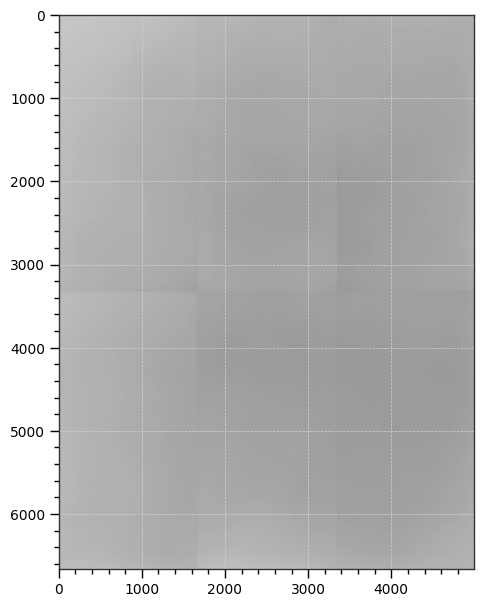

In [12]:
imshow(Image.frombytes("I;16L", (4992, 6668), white, "raw"), cmap='Greys')

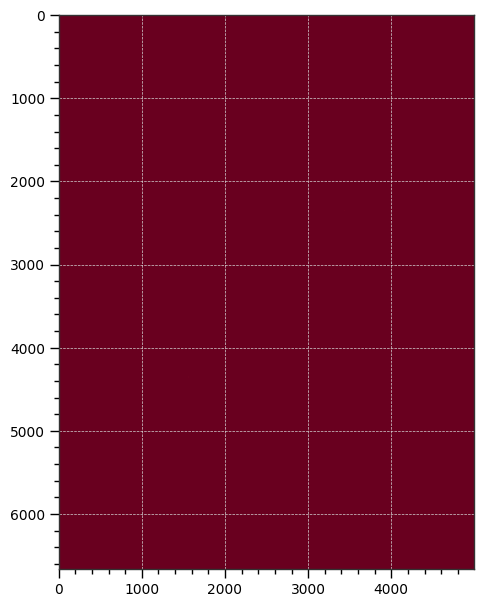

In [20]:
imshow(Image.frombytes("I;16L", (4992, 6668), black0, "raw"), cmap='RdGy')

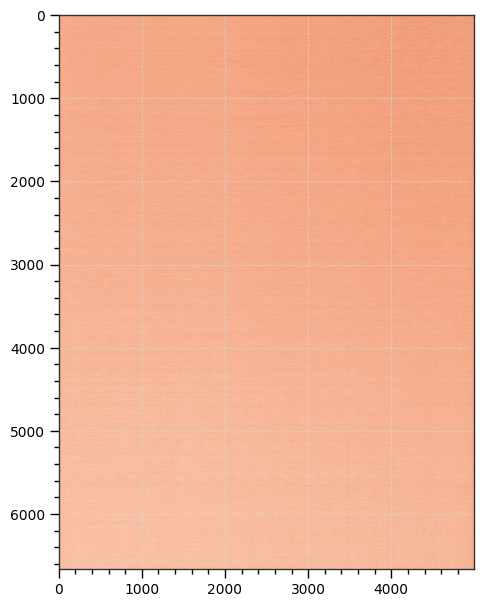

In [21]:
imshow(Image.frombytes("I;16L", (4992, 6668), black1, "raw"), cmap='RdGy')

In [152]:
update_path = Path('/Users/mgolub2/Downloads/SBeMotionUpdaterV511/SBeMotionUpdaterV511.app/Contents/Resources/emotion-5.11.upd')
update = read_raw(update_path)
update_lumps = read_pwad_lumps(update)
up_data = dict()
for k, v in update_lumps.items():
    up_data[k] = get_wad(update, *v)

In [156]:
for k in up_data:
    print(k, up_data[k][0:128])

b'EOTR' b'\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x00\x00\x00\x00\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5@\x00\x02\x00x\x01\x02\x00\x9c\x01\x02\x00\xc8\x01\x02\x00\xe4\x01\x02\x00\x00\x00\x00\x00\x1c\x03\x02\x00\xe4\x02\x02\x00\x00p\x0f\xe1\x1fp\x07\xe2\x13\x00W\xe3\x08\x00\x00\n\x00\x00\xa0\xe1\x00\x00\xa0\xe3\x04\x14\x9f\xe5\x04 \x91\xe5\x04 \x80\xe5$ \x91\xe5$ \x80\xe5\x08 \x91\xe5\x08 \x80\xe5\x00\x00\xa0\xe1\xc4\x03\x9f\xe5\x00\x10\x90\xe5'
b'EOTR33' b'\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5\x00\x00\x00\x00\x18\xf0\x9f\xe5\x18\xf0\x9f\xe5@\x00\x02\x00x\x01\x02\x00\x9c\x01\x02\x00\xc8\x01\x02\x00\xe4\x01\x02\x00\x00\x00\x00\x00\x1c\x03\x02\x00\xe4\x02\x02\x00\x00p\x0f\xe1\x1fp\x07\xe2\x13\x00W\xe3\x08\x00\x00\n\x00\x00\xa0\xe1\x00\x00\xa0\xe3\x04\x14\x9f\xe5\x04 \x91\xe5\x04 \x80\xe5$ \x91\xe5$ \x80\xe5\x08 \x91\xe5\x08 \x80\xe5\x00\x00\xa0\xe1\xc4\x03\x9f\xe5\x00\x10\x90\xe5'
b'FPGA2' b'\x1f\x8b\x08\x08\xac*

In [5]:
test_img = Path("/Users/mgolub2/Pictures/002000E8.EMO/682FD801.IA")
sinar_ia = read_sinar(test_img)
img = process_raw(sinar_ia)

In [6]:
nimg = np.clip(norm(img), 0, 1)
nimg[np.isnan(nimg)] = 0
out = demosaicing_CFA_Bayer_Menon2007(nimg, "RGGB")
Image.fromarray((out * 255).astype("uint8"), mode="RGB").rotate(90).show()

In [7]:
with open("/Users/mgolub2/Projects/sinar_emotion/ccd.dat/00525025.ref", "rb") as ccdfp:
    ccd = ccdfp.read()
with open("/Users/mgolub2/Projects/sinar_emotion/ccd.dat/00525025.dat", "rb") as datfp:
    dat = datfp.read()

In [8]:
from pidng.core import RAW2DNG, DNGTags, Tag
from pidng.defs import (
    PhotometricInterpretation,
    Orientation,
    CFAPattern,
    CalibrationIlluminant,
    DNGVersion,
    PreviewColorSpace,
)

img.shape

(5344, 4008)

In [9]:
# uncalibrated color matrix, just for demo.
mult = 1000000000
ccm1 = [
    [690277635, mult],
    [81520691, mult],
    [-52482637, mult],
    [-674076304, mult],
    [1469691720, mult],
    [769255116, mult],
    [-180923460, mult],
    [390943643, mult],
    [1601514930, mult],
]


def create_ia_dng(img: SinarIA, bpp=16, mode="COMBO"):
    t = DNGTags()
    nd_img = process_raw(img, mode=mode)
    h, w = nd_img.shape
    db_model = img.serial.split("-")[0]
    t.set(Tag.ImageWidth, w)
    t.set(Tag.ImageLength, h)
    # t.set(Tag.TileWidth, w)
    # t.set(Tag.TileLength, h)
    t.set(Tag.Orientation, 8)  # Rotate 270 CW
    t.set(Tag.PhotometricInterpretation, PhotometricInterpretation.Color_Filter_Array)
    t.set(Tag.SamplesPerPixel, 1)
    t.set(Tag.BitsPerSample, bpp)
    t.set(Tag.CFARepeatPatternDim, [2, 2])
    t.set(Tag.CFAPattern, CFAPattern.RGGB)
    # t.set(Tag.BlackLevel, (4096 >> (16 - bpp)))
    t.set(Tag.WhiteLevel, 2**bpp - 1)
    t.set(Tag.ColorMatrix1, ccm1)
    t.set(Tag.CalibrationIlluminant1, CalibrationIlluminant.D50)
    t.set(Tag.AsShotNeutral, [[1, 1], [1, 1], [1, 1]])
    t.set(Tag.Make, img.camera)
    t.set(Tag.Model, db_model)
    t.set(Tag.DNGVersion, DNGVersion.V1_4)
    t.set(Tag.DNGBackwardVersion, DNGVersion.V1_2)
    t.set(Tag.EXIFPhotoBodySerialNumber, img.serial)
    t.set(Tag.CameraSerialNumber, img.serial)
    t.set(Tag.ExposureTime, [(img.measured_shutter_us, 1000000)])
    t.set(Tag.PhotographicSensitivity, img.iso)
    t.set(Tag.SensitivityType, 3)
    t.set(Tag.FocalLength, [(int(img.focal_length), 1)])
    t.set(Tag.UniqueCameraModel, f"{db_model} on {img.camera}")
    t.set(Tag.FNumber, [(int(img.f_stop * 100), 100)])
    t.set(Tag.BayerGreenSplit, 0)
    t.set(Tag.Software, "PYEmotionDNG")
    # t.set(Tag.PreviewColorSpace, PreviewColorSpace.sRGB)
    r = RAW2DNG()
    r.options(t, path="", compress=False)
    filename = f"{img.filename.stem}_{mode.lower()}.dng"
    r.convert(nd_img, filename=filename)
    print(f"Converted {img.filename} to {filename}")


create_ia_dng(sinar_ia)

Converted /Users/mgolub2/Pictures/002000E8.EMO/682FD801.IA to 682FD801_combo.dng


In [23]:
for k, v in sorted(raws.items(), key=lambda i: i[1].shutter_count):
    # start = 360
    # end = 200
    with open(f"{v.shutter_count}_meta.bin", "wb") as metafp:
        metafp.write(v.meta)
    # print(v.meta[start:start+end], end='\t')
    # print(gle(v.meta[start:start+end]))

In [34]:
rimg = img.swapaxes(1, 0)[::-1]
img.mean(axis=(0, 1))
red = rimg[0::2, 0::2]
green1 = rimg[0::2, 1::2]
green2 = rimg[1::2, 0::2]
blue = rimg[1::2, 0::2]

2281.9009520255895

In [13]:
stacked = np.stack([red, green2, blue], axis=-1)

NameError: name 'red' is not defined

In [ ]:
imshow(norm(stacked))

In [54]:
dat[0:1024]

b'CCDF\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x08 \x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [63]:
ccd[0:512]

b'WSHF\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x05\xdc\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\xa8\x00\x00\x14\xe0\x00\x00\x00\x0e\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [20]:
gbi(dat, 12)

2080

In [44]:
43362304 - 512

43361792

In [46]:
43361792 / 4008

10818.810379241517

In [55]:
h = 5344
w = 4008
(h * w * 16) / 8 - len(ccd) - 512

-525312.0

In [58]:
525312.0 / 8

65664.0

In [91]:
21680896 / (4008)

5409.405189620758

In [64]:
dt = np.dtype(np.uint16)
dt = dt.newbyteorder(">")
dat = np.frombuffer(ccd[512:], dtype=dt)

In [87]:
dat.size - 21418752.0

262144.0

In [86]:
(h * w * 16) / 16

21418752.0

In [88]:
262144.0 / 512

512.0

In [92]:
len(ccd[512:])

43361792

In [93]:
43361792 / 2

21680896.0

In [94]:
from math import sqrt


def get_factors(n):
    """Returns a sorted list of all unique factors of `n`."""
    factors = set()
    for i in range(1, int(sqrt(n)) + 1):
        if n % i == 0:
            factors.update([i, n // i])
    return sorted(factors)

In [116]:
get_factors(262144.0)

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024.0,
 2048.0,
 4096.0,
 8192.0,
 16384.0,
 32768.0,
 65536.0,
 131072.0,
 262144.0]

In [97]:
21680896.0 / 1024

21172.75

In [98]:
len(ccd)

43362304

In [112]:
len(ccd[512:]) / 2 - (4008 * 5344)

262144.0

In [113]:
262144.0 / 4096

64.0

In [114]:
ccd[512:4096]

b'/+6B-\xb96\xba.\'6j.q7\t.\xe26\xbb.\x8f6\x8c.M6\x93.\x016\xbb.\x987\x0c.\x8f6\xe2.r6\xe4.M6C.\x946\xba.\x976\xb8.p7Y.\xbd6C.\xbd6\xb8.\xaa6k.s6\xbc.N6k.\x986\xe4.)6\x94.s71.\xbe7\x0c.N7\r.s7\x0c.\x8f6\xbb.t6l.N7\r.t7\x85.\x986\xe4.N7\r.\xbf6\xbb.\x986\xb3.\xe46\xe5.\x996\xe4.*7\x82.o7\r.\x997U.\x997\\.\xbd74.\x987^.\xbe7\r.\xbe7\r.t75.\xb675.o7].\xe46\xb8.\x947\x0e.o7].\xbe6\xe4.\x997\x0e.v7].\x997^.\x9b76.\x9a6\xe6.\xc075.\xb96\xbd.\xbf7\x0e.\xaf75.\x997\x86.\xb67^.\x9a7\x87/%6\xdd.\x9a7\xd8.u7^/\n7_.\x9a6\x95.\xe57^/\t76/\n7^.\x906\xe6.\x9a7^.\xdb7\x0e//77.\x9a7\x0e.\xe57\x87.\x9a76.\xc077.\xc07\xaf.\xe47\x0e.\xdf7\x0e.\xbf7^.u7_.\xb676/\n7^.\xc17_.\xc07\xb0.\xe67_.\xe57\x87//7\x87.\xb577.\xe67\x0e//7\xb0.\x9b7\x88.\x947\xd9.\xba7\xb0/\x0b7\x0f.\xc07\xb0.\xc18\x00.\xbf7\x0e.u7\xd9.\xc07\x87.\xe57\x0f.\xc17\x88/07\x88.\xe67\x88/O7_.\xc07\x88.\xe57\xaf.\xe57\xb0.\xc07\x0f.\xdf7\x0f.\x9a7\xaa.\xd57\xb0.v7\xa6.\xc17_.\xe67\xb0.\xe67_.\x9b7\x88/U7\x88/07_/\x047U/07\x88.Q7\xb1/{7\x88/\x0

In [115]:
len(ccd)

43362304